<a href="https://colab.research.google.com/github/wannleach/MAT-421/blob/main/ModuleB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chapter 17: Interpolation (Part 2)**

*17.4: Lagrange Polynomial Interpolation*

Lagrange polynomial interpolation uses a single polynomial based on points from a data set for estimation rather than multiple polynomials (such as with cubic splicing). This single polynomial is called a Lagrange Polynomial $L(x)$, and is based on a set of basis polynomials called Lagrange Basis Polynomials $P_i(x)$, whose formulas are defined by the equation below:
$$P_i(x) = {\Pi}^n_{j=1,j\neq i} \frac{x - x_j}{x_i - x_j}$$
For the sets $x=[9,10,11]$ and $y=[18,20,22]$, the following calculations result in their Langrage Basis Polynomials:

$$P_1(x) = \frac{(x-x_2)}{(x_1-x_2)}*\frac{(x-x_3)}{(x_1-x_3)}=0.5(x^2-21x+110)$$
$$P_2(x) = \frac{(x-x_1)}{(x_2-x_1)}*\frac{(x-x_3)}{(x_2-x_3)}=-(x^2-20x+99)$$
$$P_3(x) = \frac{(x-x_1)}{(x_3-x_1)}*\frac{(x-x_2)}{(x_3-x_2)} = 0.5(x^2-19x+90)$$

The equation to find the single Lagrange Polynomial based on its basis is as follows:
$$L(x) = {\Sigma}^n_{i=1} (y_i P_i(x))$$

Thus, the Lagrange equation can calculated as shown below:

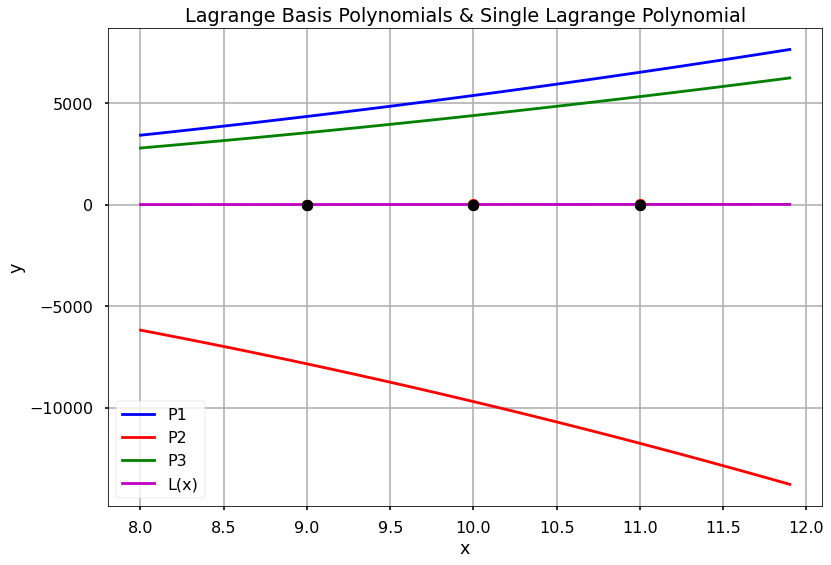

In [31]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

# Lagrange Basis Polynomials
x = [9, 10, 11]
y = [18, 20, 22]
P1_coeff = [0.5, -10.5, 55]
P2_coeff = [-1, 20, -99]
P3_coeff = [0.5, -9.5, 45]

# get the polynomial function
P1 = poly.Polynomial(P1_coeff) 
P2 = poly.Polynomial(P2_coeff)
P3 = poly.Polynomial(P3_coeff)

# Lagrange Polynomial
L = 18*P1 + 20*P2 + 22*P3 

# plotting all polynomials (Lagrange basis & L(x))
x_new = np.arange(8, 12, 0.1)

fig = plt.figure()
plt.plot(x_new, P1(x_new), 'b', label = 'P1')
plt.plot(x_new, P2(x_new), 'r', label = 'P2')
plt.plot(x_new, P3(x_new), 'g', label = 'P3')
plt.plot(x_new, L(x_new), 'm', label = 'L(x)')
plt.plot(x, y, 'ro')
plt.plot(x, np.ones(len(x)), 'ko', x, np.zeros(len(x)), 'ko')
plt.title('Lagrange Basis Polynomials & Single Lagrange Polynomial')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

We can also use Python's "scipy" package to calculate the lagrange polynomial using its "langrange()" function:

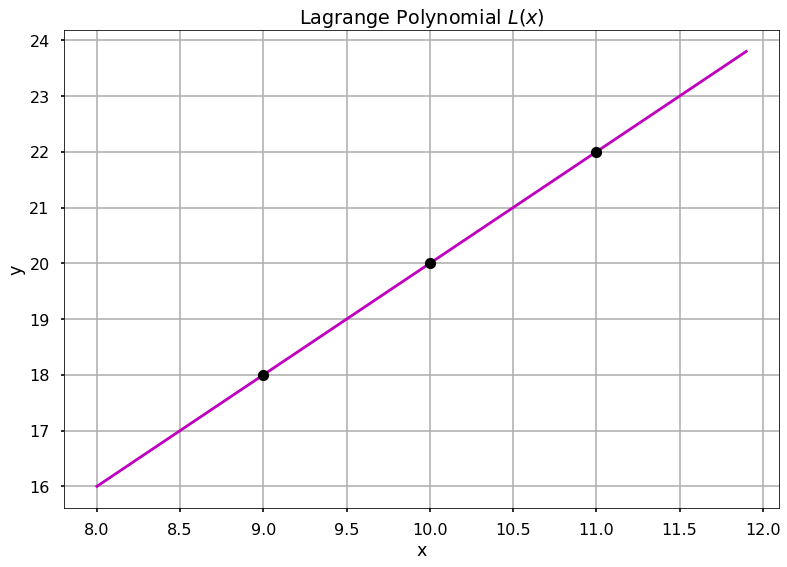

In [28]:
from scipy.interpolate import lagrange

# get the single polynomial
f = lagrange(x, y)

# plotting the polynomial
fig = plt.figure()
plt.plot(x_new, f(x_new), 'm', x, y, 'ko')
plt.title('Lagrange Polynomial $L(x)$')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

*17.5: Newton's Polynomial Interpolation*

Newton polynomial interpolation also estimates values with a single polynomial rather than with a collection of polynomials. The formula for this polynomial is as follows:
$$f(x) = {\Sigma}^n_{i=0}a_in_i(x)$$
$$n_i(x) = {\Pi}^{i-1}_{j=0} (x-x_j)$$

To find the coefficients of a Newton polynomial, the following iterative equation is used (or recursive depending on solution technique):
$$f[x_o, x_1, ..., x_k] = \frac{f[x_1, x_2, ..., x_k] - f[x_0, x_1, ..., x_{k-1}]}{x_k-x_0}$$

This equation to find coefficients creates a "divided differences table," where each previous solution is used to find future coefficients. This table creates a matrix of coefficients as follows:
$$\matrix{y_0 & f[x_0, x_1] & f[x_0, x_1, x_2] & f[x_0, x_1, x_2, x_3] & f[x_0, x_1, x_2, x_3, x_4] \cr y_1 & f[x_1, x_2] & f[x_1, x_2, x_3] & f[x_1, x_2, x_3, x_4] & 0\cr y_2 & f[x_2, x_3] & f[x_2, x_3, x_4] & 0 & 0 \cr y_3 & f[x_3, x_4] & 0 & 0 & 0\cr y_4 & 0 & 0 & 0 & 0}$$

Below, the custom function "divded_diff(x, y)" finds this matrix using iterative logic, with the function "newton_poly(coef, x_data, x)" finding the polynomial based on these coefficients which can be used to estimate values as shown in the following graph with values $x=[2, 3, 4, 5, 6]$ and $y=[4, 2, 6, 10, 2]$:

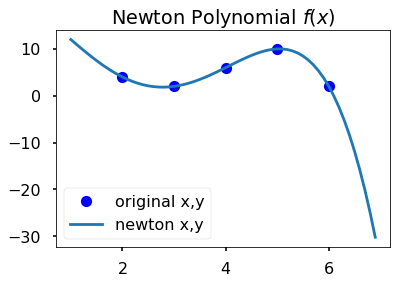

In [47]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline

# find coefficients iteratively
def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y) # number of outcomes
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

# find the newton polynomial
def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial 
    at x
    '''
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p
x = np.array([2, 3, 4, 5, 6])
y = np.array([4, 2, 6, 10, 2])
a_s = divided_diff(x, y)[0, :] # get the divided difference coef

# evaluate on new data points
x_new = np.arange(1, 7, .1)
y_new = newton_poly(a_s, x, x_new)

# plot newton polynomial comparing old vs new data points
plt.figure()
plt.plot(x, y, 'bo', label='original x,y');
plt.plot(x_new, y_new, label='newton x,y');
plt.legend();
plt.title('Newton Polynomial $f(x)$');